In [3]:
#import packages
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("float_format",'{:f}'.format)
warnings.filterwarnings("ignore")

In [4]:
pwd

'C:\\Users\\zaxir\\Documents\\my_pj\\learn\\kaggle\\TPS August2021'

In [5]:
train_df = pd.read_csv("../../../data/tabular-playground-series-aug-2021/train.csv")

In [6]:
test_df = pd.read_csv("../../../data/tabular-playground-series-aug-2021/test.csv")
submission = pd.read_csv("../../../data/tabular-playground-series-aug-2021/sample_submission.csv")


In [7]:
for col in train_df.columns:
    if np.sum((train_df[col]-train_df[col].astype('int'))) == 0:
        train_df[col] =  train_df[col].astype('int')
        
for col in test_df.columns:
    if np.sum((test_df[col] - test_df[col].astype('int'))) == 0:
        test_df[col] = test_df[col].astype('int')

In [8]:
train_df.head(5)

id        f0   f1        f2        f3           f4        f5         f6  \
0   0 -0.002350   59  0.766739 -1.350460    42.272700 16.685700  30.359900   
1   1  0.784462  145 -0.463845 -0.530421 27324.900000  3.475450 160.498000   
2   2  0.317816   19 -0.432571 -0.382644  1383.260000 19.712900  31.102600   
3   3  0.210753   17 -0.616454  0.946362  -119.253000  4.082350 185.257000   
4   4  0.439671   20  0.968126 -0.092546    74.302000 12.306500  72.186000   

         f7         f8       f9       f10       f11        f12       f13  \
0  1.267300   0.392007 1.091010  1.968740  1.874640 117.286000  6.716200   
1  0.828007   3.735860 1.281380 -2.739470 -0.529506 157.670000  0.696384   
2 -0.515354  34.430800 1.242100  2.901800 -0.960340 118.590000  7.696420   
3  1.383310 -47.521400 1.091300 -1.512000 -1.292340 125.461000  7.343230   
4 -0.233964  24.399100 1.101510  1.773480 -0.546781 147.186000 17.394300   

        f14      f15       f16       f17       f18       f19       f20  \
0  0.985656 0.973428   4004232  0.377896  1.033820  0.574531  0.122371   
1  1.441230 0.159056  23567462 -0.089583 -0.711628 -1.045860  0.139920   
2  1.488760 0.387277    235760  0.055568  0.268560  0.718133  0.027133   
3 -3.092390 0.713795   1146032  0.326534  0.454842  0.219958  0.037982   
4  0.964678 0.964894  19272478  0.121071  0.422461 -0.103100 -0.000910   

        f21         f22      f23       f24       f25        f26    f27  \
0  8.186170 1517.830000 3.132190  0.112836  5.018680 116.766000  10891   
1  3.692940 -123.354000 7.740970 -0.852302  8.510250 161.175000  87801   
2 11.673400  270.247000 3.440510 -0.679071 13.378100 150.362000  14173   
3  5.151950 4893.860000 6.897510 -0.830552  4.431840 132.855000  77147   
4  8.141910  162.713000 1.565610 -0.300743  7.564580 160.995000   5780   

        f28      f29      f30       f31       f32      f33        f34  \
0  8.193660 5.797150 1.099990 14.868400 -0.275434 0.915721 167.800000   
1 12.020200 1.783930 1.231000 10.149700 -0.018724 1.011280 127.401000   
2  1.699540 7.047280 1.105130  7.628710  0.685721 0.809485 120.064000   
3 32.809000 4.063900 1.119110  3.917760  0.500353 0.206448 120.411000   
4 -1.542540 8.090810 1.605820  7.046320 -1.056850 1.727440 126.848000   

         f35      f36       f37       f38       f39       f40      f41  \
0  -7.534140 4.236320  1.629560  1.144400 -0.303139  4.092090 3.226170   
1  11.821400 5.996810 -0.953850  1.379370  1.079530  0.711923 2.906020   
2 194.427000 6.778660  0.634136  0.934386  0.926980  0.741116 2.422050   
3 233.537000 7.751310  0.625762 -1.940810  1.333210 -5.793170 1.565120   
4   0.910761 6.088680  0.150619  1.134610  1.553550 16.436400 2.488670   

       f42      f43        f44        f45       f46      f47       f48  \
0 0.074799 0.259497 289.492000 327.465000  5.389310 7.394790 -0.489950   
1 0.051206 0.755122 140.893000  29.525200 14.229600 3.532130 -0.405681   
2 0.260362 0.626639 369.579000 370.024000  4.488930 7.842900  1.196010   
3 0.309483 0.134558  84.863700  24.335300  4.871200 2.551040 -0.372300   
4 0.229194 0.374760 465.293000  76.859300  0.763062 8.206570 -0.646135   

        f49      f50      f51           f52       f53       f54   f55  \
0 20.292300 2.456600 1.447720 -10639.000000 85.600500 -0.178513  2815   
1 42.535700 1.435330 0.939771 138312.000000 59.881000 -0.070959  1435   
2 43.534300 2.591820 1.256710 168881.000000 83.841900  2.713230  2911   
3 14.896000 1.100130 0.892193  17006.600000 78.407800  0.425686  1723   
4 72.767400 1.444810 0.858525 -40791.900000 70.799800  0.169193  1199   

           f56      f57       f58       f59               f60        f61  \
0  -234.772000 1.833170 88.560500  0.367916 8575340000.000000  70.973300   
1  1046.880000 1.567700 29.430600  2.455150 4518200000.000000  75.560200   
2 23256.900000 3.918960 97.557800  4.385380  844497000.000000  99.493300   
3   375.240000 1.945390 98.150000 -0.109164 3543970000.000000  60.808200   
4  -120.388000 1.687860 84.064900 -0.08

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int32(7)
memory usage: 187.9 MB


In [12]:
print(train_df.shape)
train_df.describe().T

(250000, 102)


count              mean               std              min  \
id   250000.000000     124999.500000      72168.927986         0.000000   
f0   250000.000000          0.511213          0.307884        -0.069273   
f1   250000.000000         51.378476         42.396636       -17.000000   
f2   250000.000000          0.107155          1.322200        -7.895580   
f3   250000.000000          0.050010          0.792368        -1.475560   
f4   250000.000000       3595.133426       6072.401061     -7589.280000   
f5   250000.000000          8.205953          5.475723        -3.291050   
f6   250000.000000        164.508753        183.335563       -40.967200   
f7   250000.000000          0.375533          0.813597        -4.143080   
f8   250000.000000         16.669745         99.758709      -502.813000   
f9   250000.000000          1.190382          0.099700         0.934037   
f10  250000.000000          0.063664          2.433281       -10.261200   
f11  250000.000000          0.095226          0.935765        -1.858720   
f12  250000.000000        136.746037         14.422095       108.086000   
f13  250000.000000          8.034918          5.487786        -2.115510   
f14  250000.000000          0.614930          1.619192        -8.648960   
f15  250000.000000          0.752971          0.626172        -1.805330   
f16  250000.000000    8891112.398220    8508966.900014  -1173084.000000   
f17  250000.000000          0.009645          0.103460        -0.341300   
f18  250000.000000          0.041674          0.684975        -2.777610   
f19  250000.000000          0.074226          0.739724        -3.693950   
f20  250000.000000          0.321328          0.337792        -0.029620   
f21  250000.000000          9.928838          5.661423        -0.732186   
f22  250000.000000       3622.094586       6328.918702    -10875.700000   
f23  250000.000000          7.413526          3.740530         0.095849   
f24  250000.000000         -0.480271          0.712486        -1.771980   
f25  250000.000000          6.046948          3.172873        -2.759340   
f26  250000.000000        137.635093         15.710846       100.861000   
f27  250000.000000      47223.903504      36013.179913     -3391.000000   
f28  250000.000000          5.469358          7.716520        -4.283380   
f29  250000.000000          7.155835          3.443207         0.404425   
f30  250000.000000          1.206363          0.134848         0.842903   
f31  250000.000000          6.461029          2.451240        -0.883213   
f32  250000.000000         -0.018490          0.787275        -1.824650   
f33  250000.000000          1.574449          1.109286        -0.431699   
f34  250000.000000        136.830167         14.816130       105.359000   
f35  250000.000000        173.530314        201.166381       -29.524300   
f36  250000.000000          6.283875          3.530354        -2.776090   
f37  250000.000000          0.157174          1.728653       -13.697300   
f38  250000.000000          0.502435          1.789297        -5.747540   
f39  250000.000000          0.848153          0.627197        -1.496630   
f40  250000.000000          1.424413          6.473798       -21.149700   
f41  250000.000000          2.364249          1.227176        -6.230930   
f42  250000.000000          0.134738          0.084534        -0.021232   
f43  250000.000000          0.428217          0.182512        -0.058179   
f44  250000.000000        115.320117        104.562112        -2.736050   
f45  250000.000000        113.637385        100.874754       -15.347800   
f46  250000.000000          7.092164          3.647758         0.159225   
f47  250000.000000          5.100105          3.211041        -2.066890   
f48  250000.000000         -0.095555          0.792784        -1.911800   
f49  250000.000000         87.844474         70.327252       -48.143900   
f50  250000.000000          1.894125          0.706721        -0.535985   
f51  250000.000000          0.847267  

In [13]:
train_df.dtypes

id        int32
f0      float64
f1        int32
f2      float64
f3      float64
f4      float64
f5      float64
f6      float64
f7      float64
f8      float64
f9      float64
f10     float64
f11     float64
f12     float64
f13     float64
f14     float64
f15     float64
f16       int32
f17     float64
f18     float64
f19     float64
f20     float64
f21     float64
f22     float64
f23     float64
f24     float64
f25     float64
f26     float64
f27       int32
f28     float64
f29     float64
f30     float64
f31     float64
f32     float64
f33     float64
f34     float64
f35     float64
f36     float64
f37     float64
f38     float64
f39     float64
f40     float64
f41     float64
f42     float64
f43     float64
f44     float64
f45     float64
f46     float64
f47     float64
f48     float64
f49     float64
f50     float64
f51     float64
f52     float64
f53     float64
f54     float64
f55       int32
f56     float64
f57     float64
f58     float64
f59     float64
f60     float64
f61     

In [15]:
integer_features = ['f1','f16','f27','f55','f86']
unique_values_train = pd.DataFrame(train_df[integer_features].nunique())
unique_values_train  = unique_values_train.reset_index(drop=False)
unique_values_train.columns = ['Features','Count']

unique_values_percent_train = pd.DataFrame(train_df[integer_features].nunique()/train_df.shape[0])
unique_values_percent_train = unique_values_percent_train.reset_index(drop=False)
unique_values_percent_train.columns = ['Features', 'Count']

unique_values_test = pd.DataFrame(test_df[integer_features].nunique())
unique_values_test = unique_values_test.reset_index(drop=False)
unique_values_test.columns = ['Features', 'Count']

unique_values_percent_test = pd.DataFrame(test_df[integer_features].nunique()/test_df.shape[0])
unique_values_percent_test = unique_values_percent_test.reset_index(drop=False)
unique_values_percent_test.columns = ['Features', 'Count']

In [16]:
unique_values_train.head()

Features   Count
0       f1     289
1      f16  247476
2      f27   37471
3      f55    4726
4      f86     329

In [17]:
unique_values_percent_train.head()

Features    Count
0       f1 0.001156
1      f16 0.989904
2      f27 0.149884
3      f55 0.018904
4      f86 0.001316

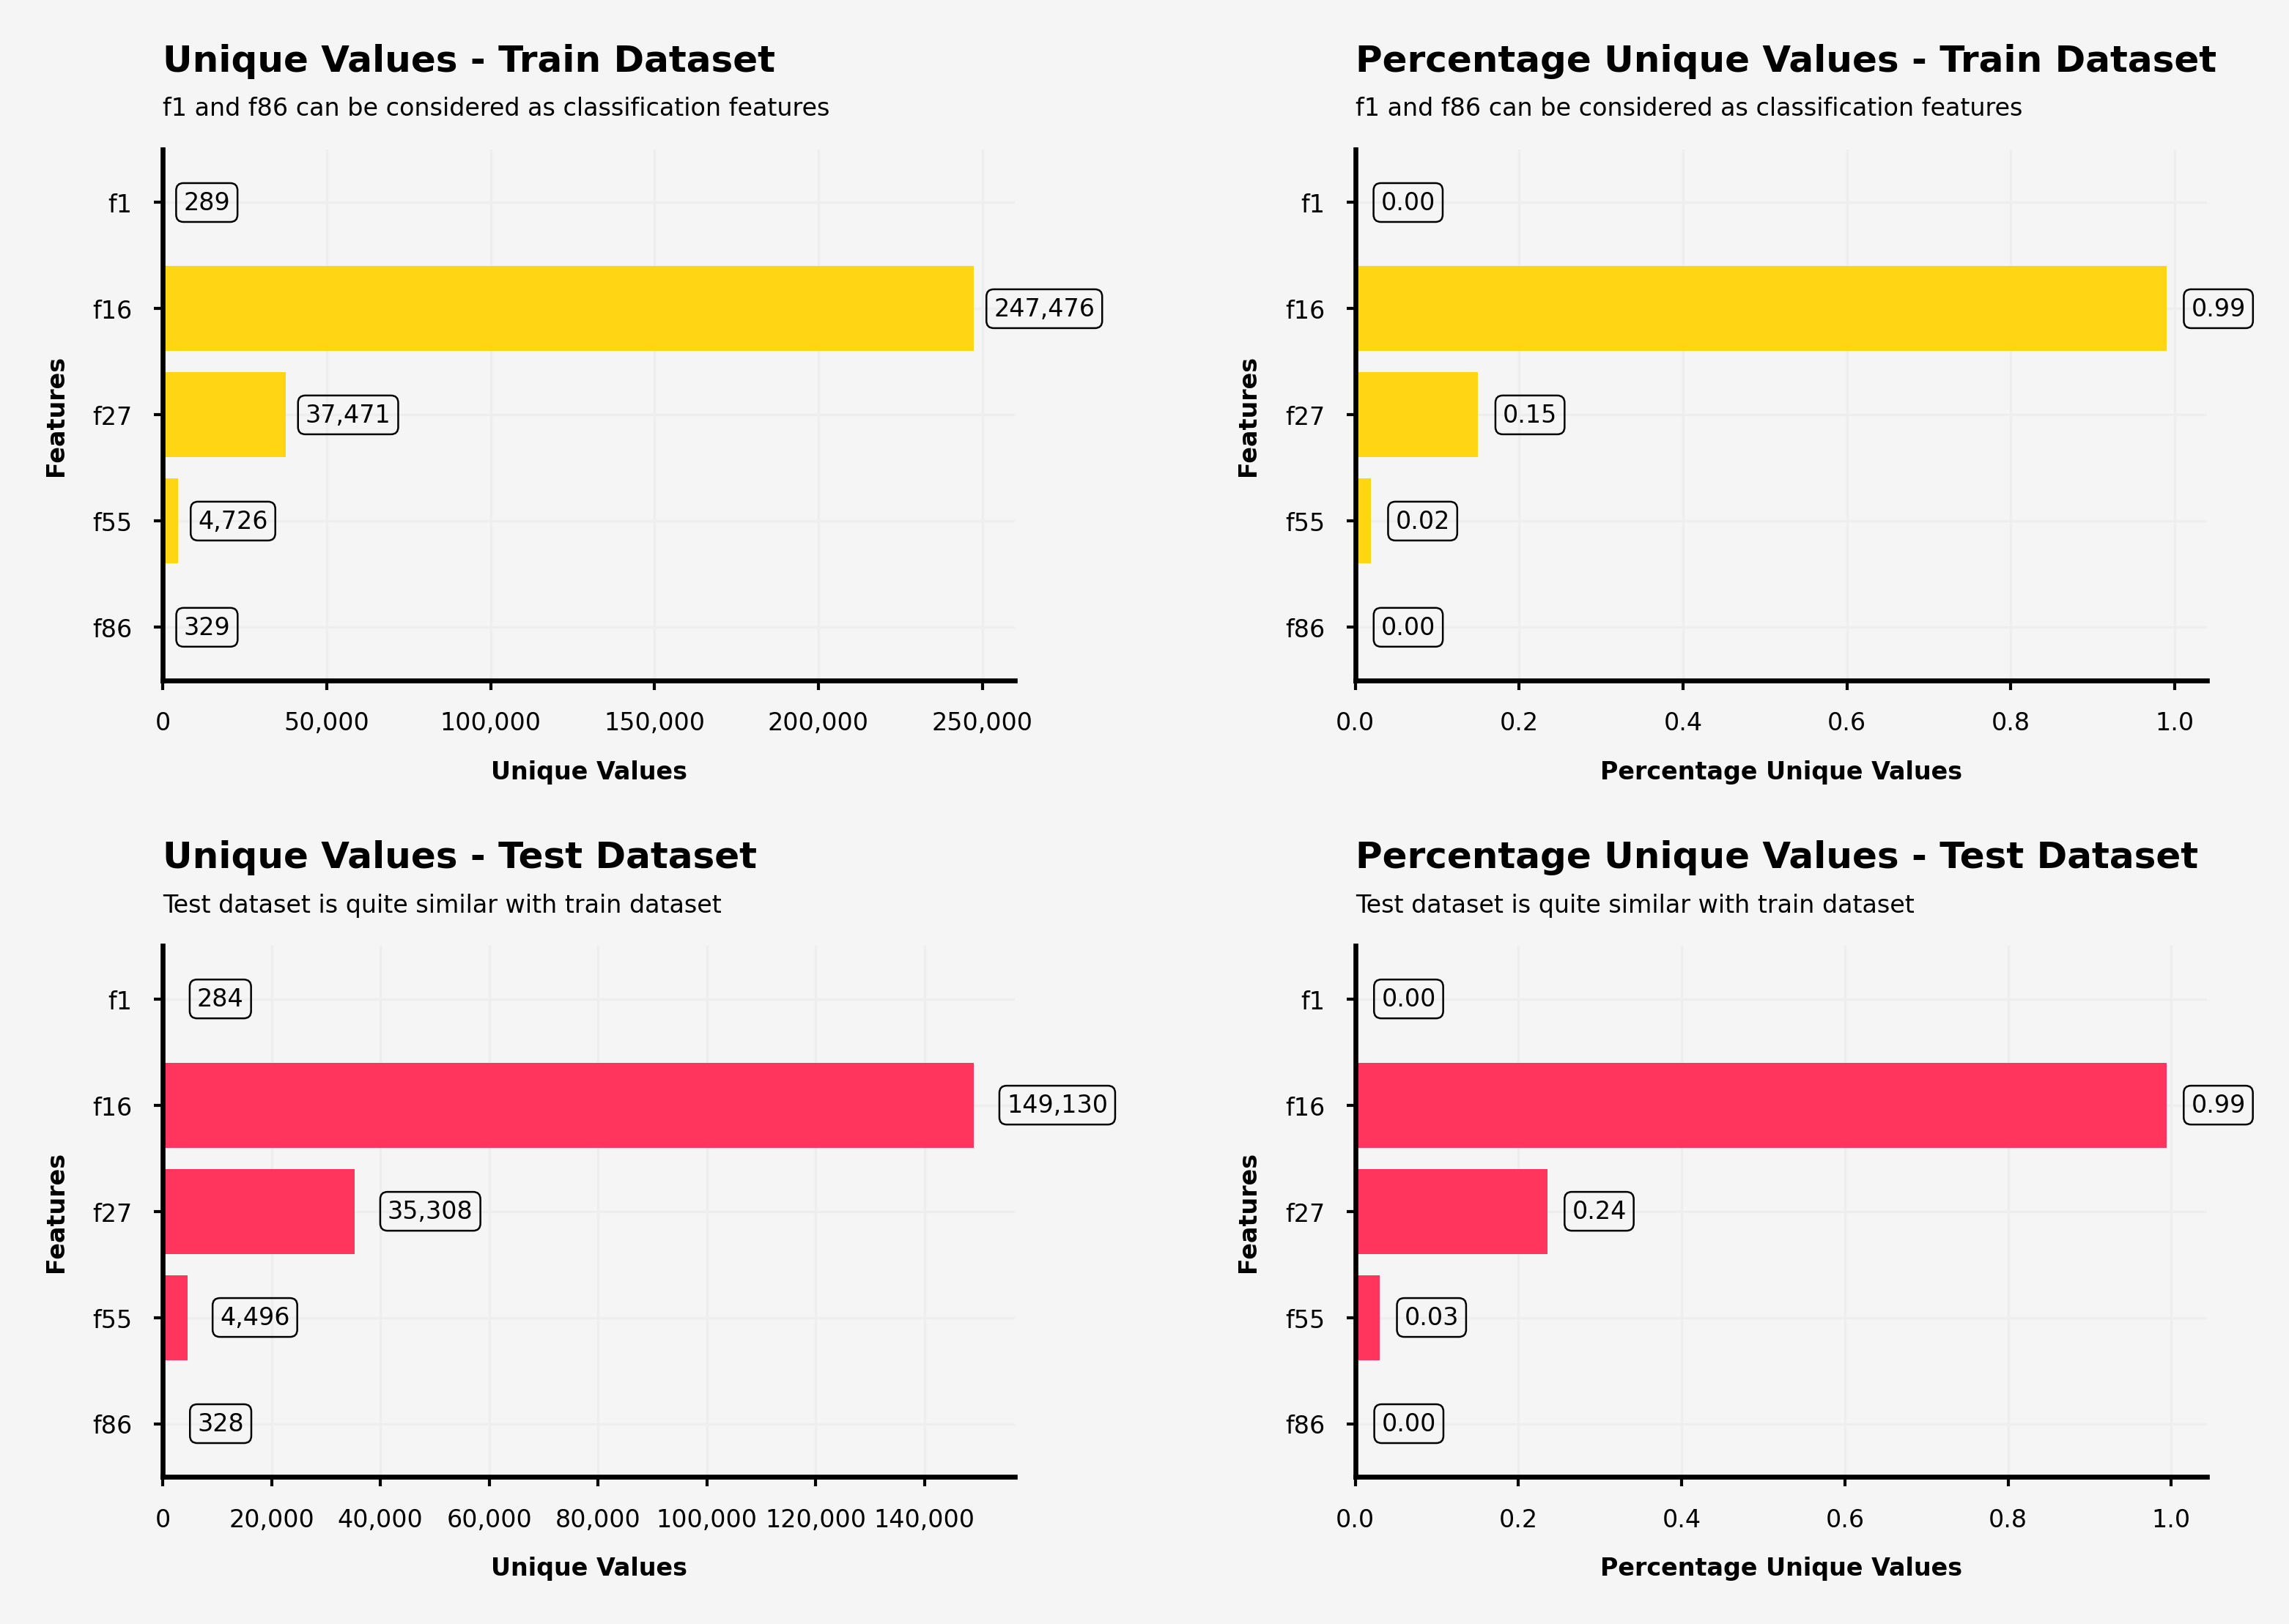

In [18]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.4, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*6)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_train['Features'], x=unique_values_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.5, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1, 'f1 and f86 can be considered as classification features', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 6000
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_values_percent_train['Features'], x=unique_values_percent_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Percentage Unique Values",fontsize=4, weight='bold')
ax1_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1.5, 'Percentage Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax1.text(0, -1, 'f1 and f86 can be considered as classification features', fontsize=4, ha='left', va='top')
# data label
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*6)
    
ax3 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3_sns = sns.barplot(ax=ax3, y=unique_values_test['Features'], x=unique_values_test['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax3_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax3_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax3_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3.text(0, -1.5, 'Unique Values - Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax3.text(0, -1, 'Test dataset is quite similar with train dataset', fontsize=4, ha='left', va='top')
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax3.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 6000
    y = p.get_y() + p.get_height() / 2 
    ax3.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    
ax4 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)
ax4.set_facecolor(background_color)
ax4_sns = sns.barplot(ax=ax4, y=unique_values_percent_test['Features'], x=unique_values_percent_test['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax4_sns.set_xlabel("Percentage Unique Values",fontsize=4, weight='bold')
ax4_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax4_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4.text(0, -1.5, 'Percentage Unique Values - Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax4.text(0, -1, 'Test dataset is quite similar with train dataset', fontsize=4, ha='left', va='top')
# data label
for p in ax4.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2 
    ax4.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

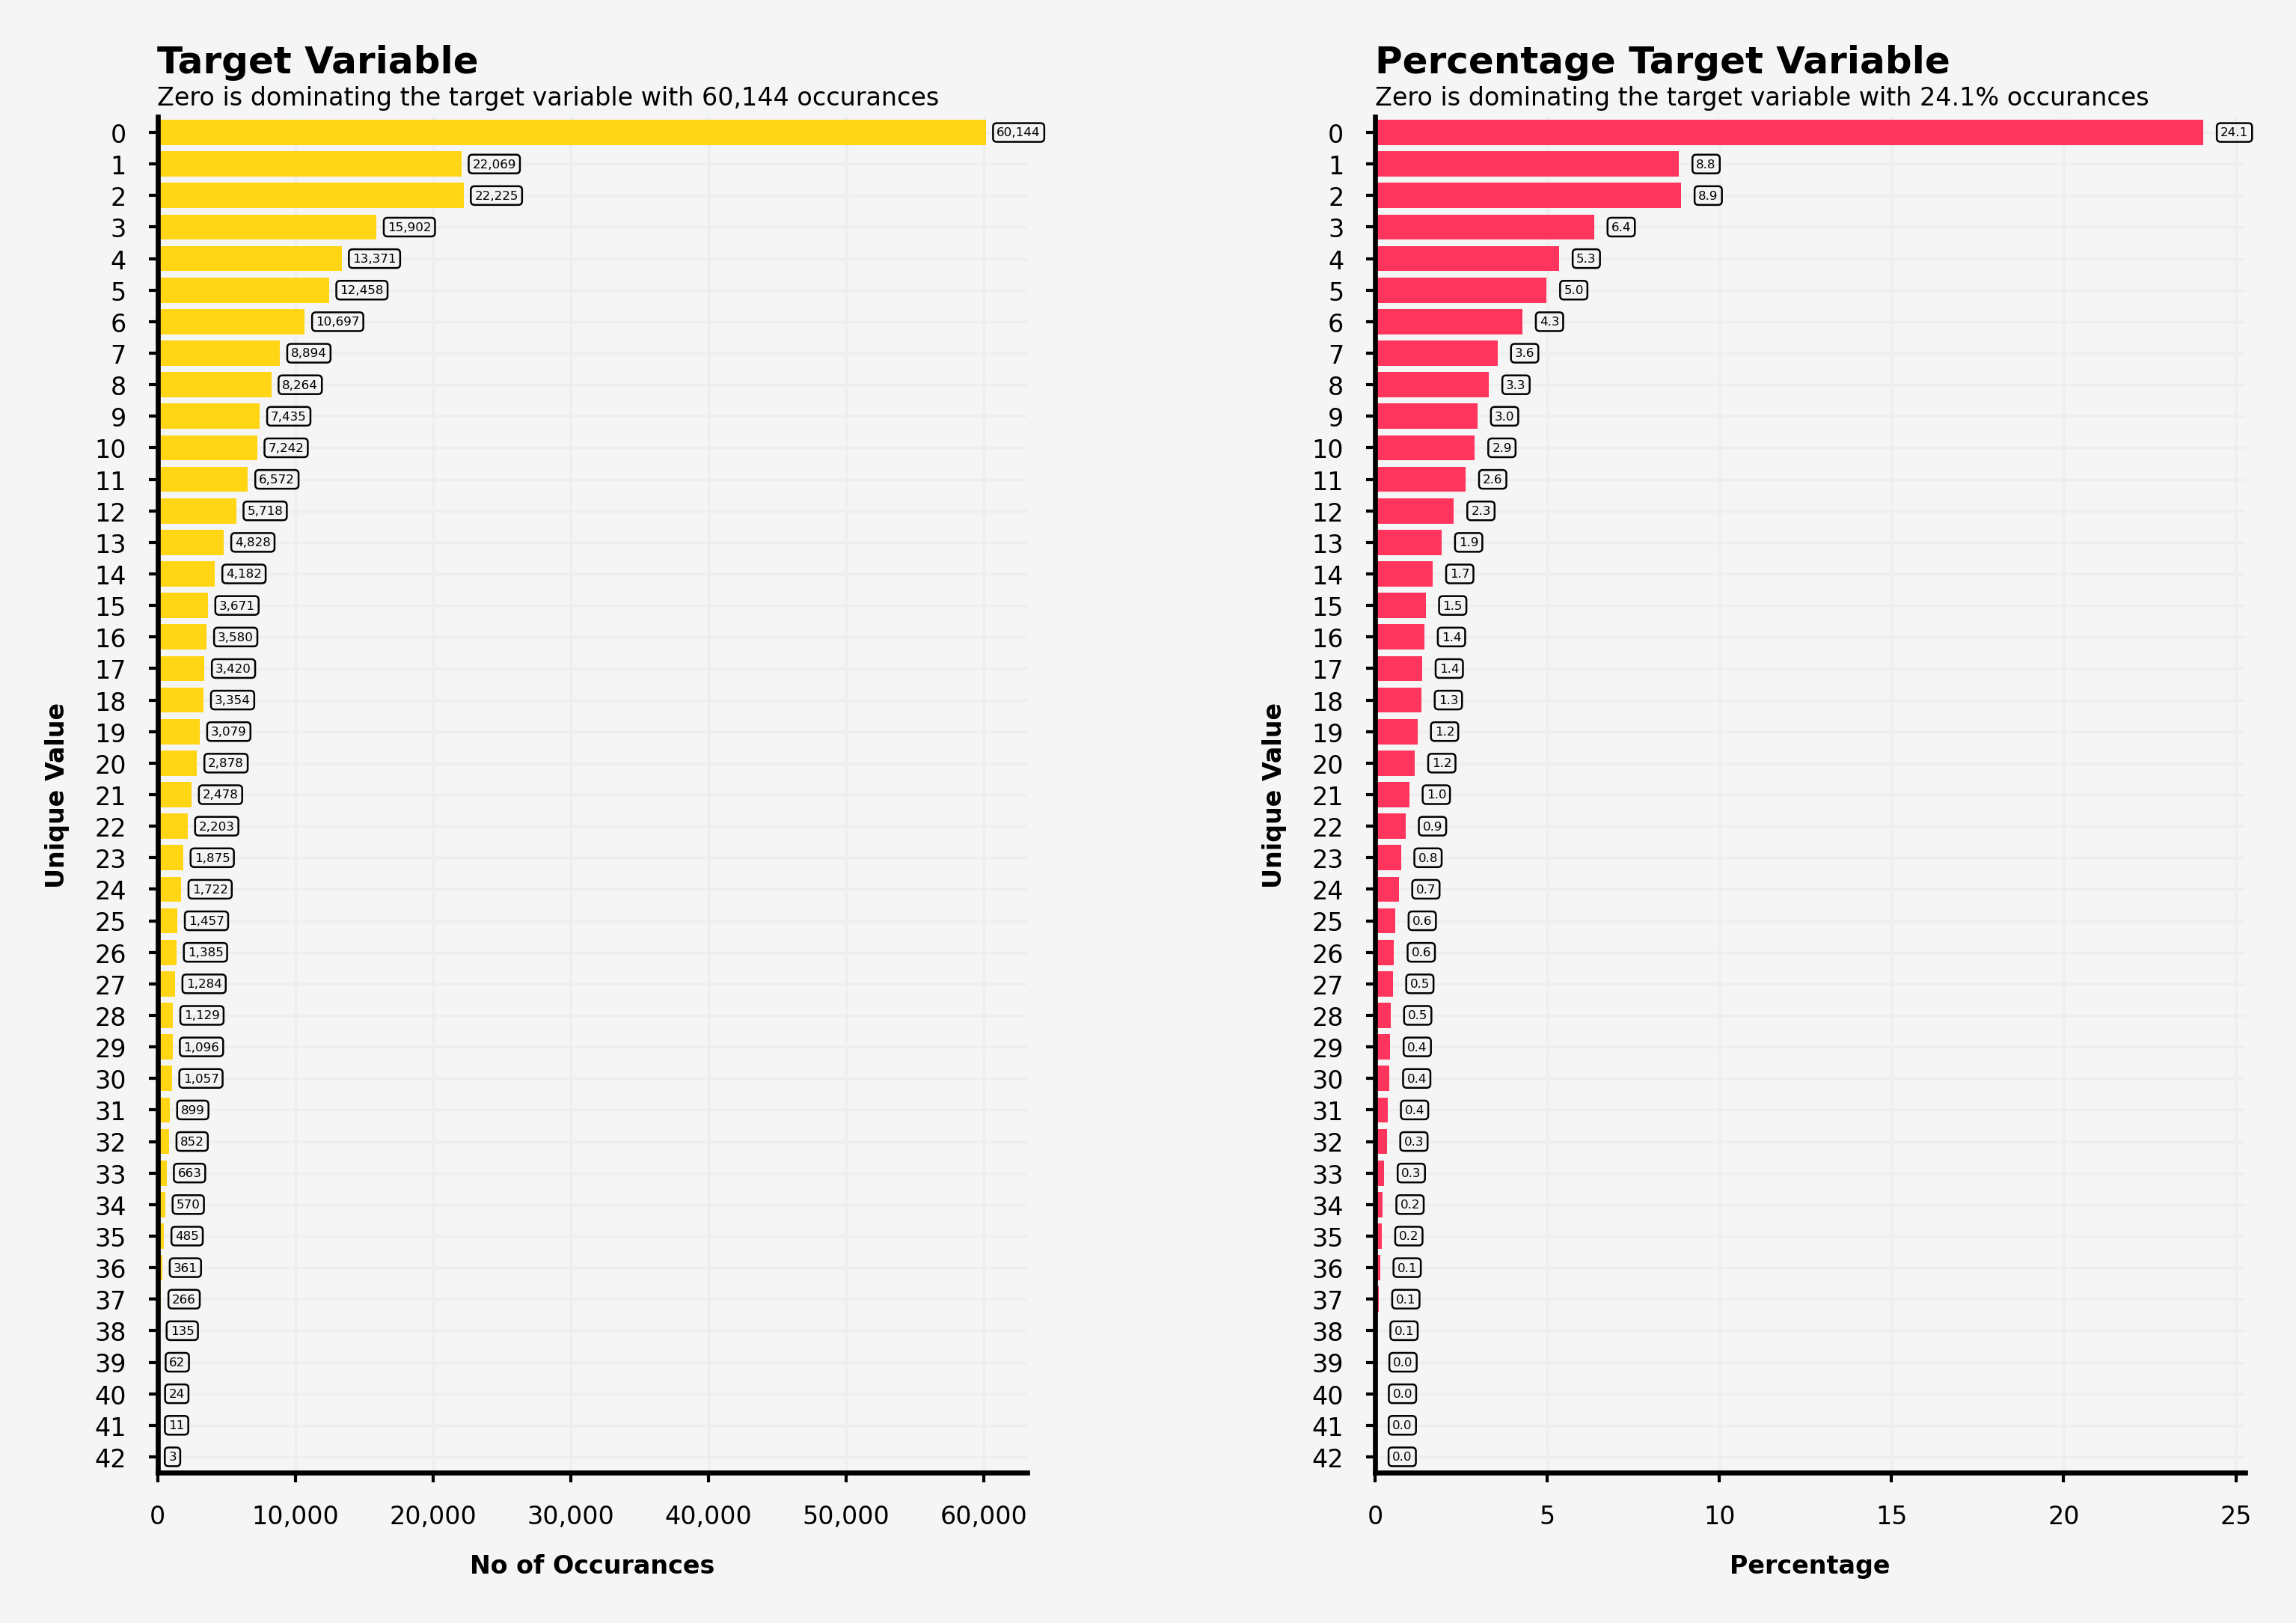

In [19]:
unique_values_target = pd.DataFrame(train_df['loss'].value_counts())
unique_values_target = unique_values_target.reset_index(drop=False)
unique_values_target.columns = ['Value', 'Count']

unique_values_percentage_target = pd.DataFrame(train_df['loss'].value_counts()/train_df.shape[0] * 100)
unique_values_percentage_target = unique_values_percentage_target.reset_index(drop=False)
unique_values_percentage_target.columns = ['Value', 'Count']

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*43)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_target['Value'], x=unique_values_target['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("No of Occurances",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Unique Value",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -2.8, 'Target Variable', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1.5, 'Zero is dominating the target variable with 60,144 occurances', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 800
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    
sns.set_palette(['#ff355d']*43)

ax0 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_percentage_target['Value'], x=unique_values_percentage_target['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Percentage",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Unique Value",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -2.8, 'Percentage Target Variable', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1.5, 'Zero is dominating the target variable with 24.1% occurances', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.1f}'
    x = p.get_x() + p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


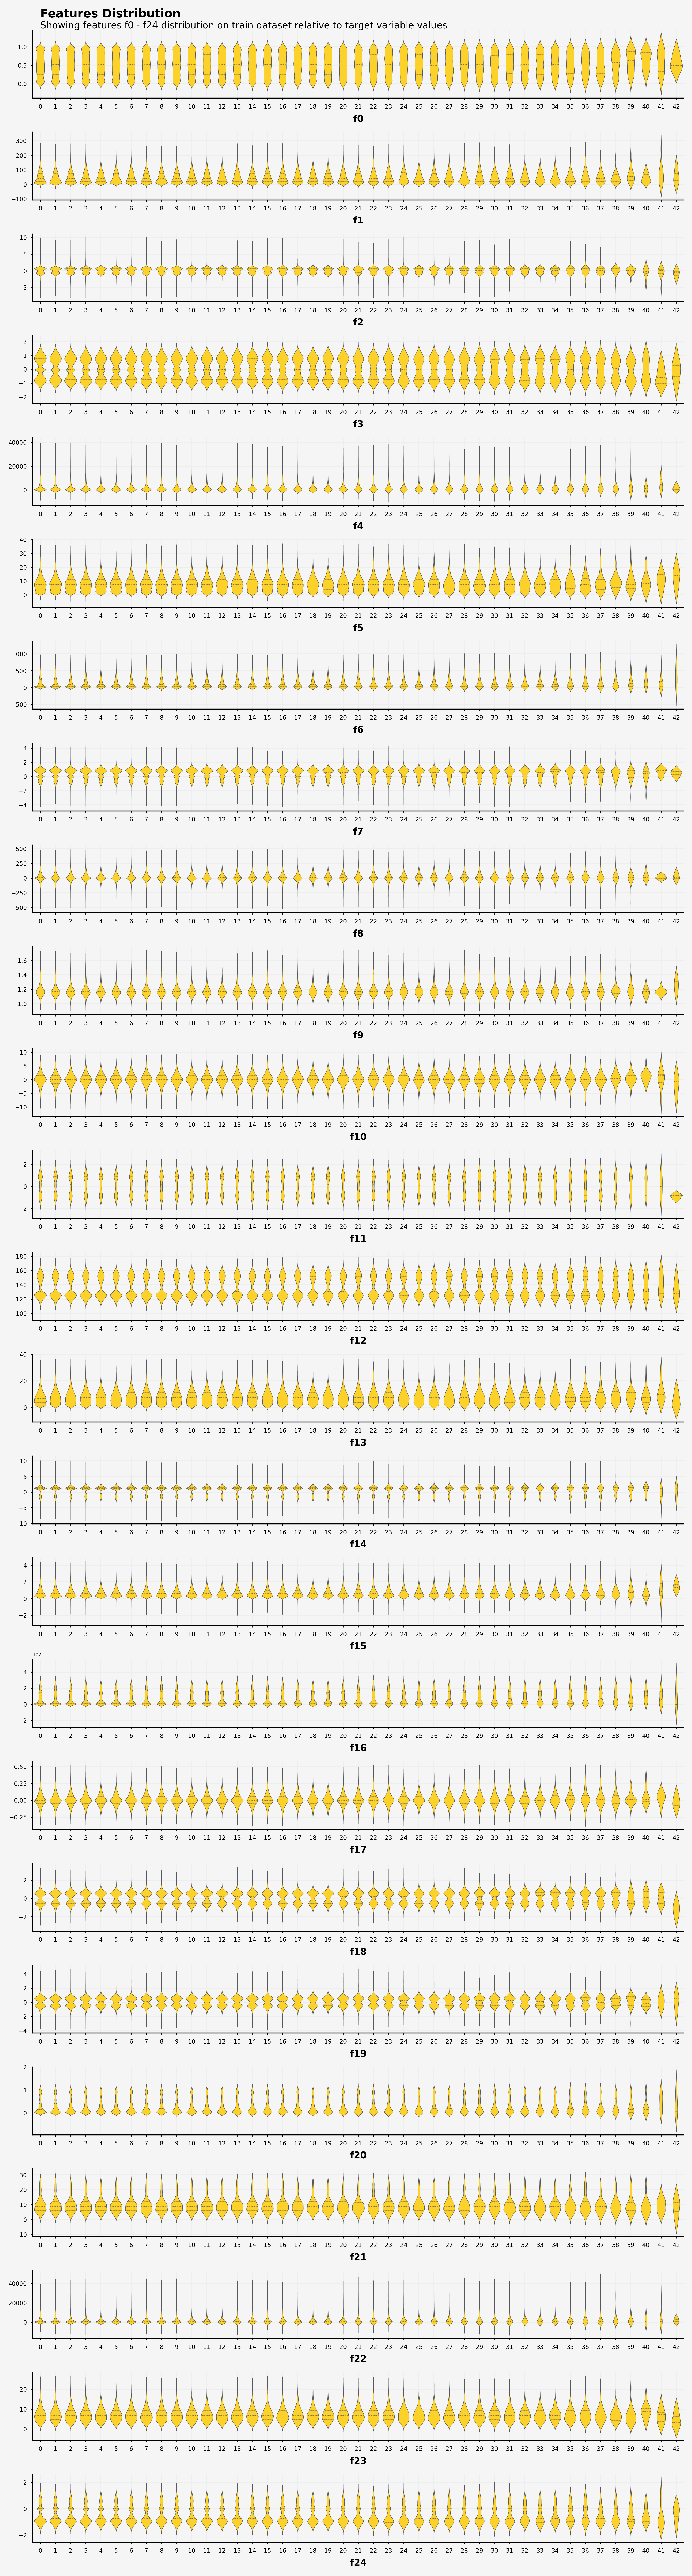

In [20]:
features = list(train_df.columns[1:26])

plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(10,160), facecolor='#f6f5f5')
gs = fig.add_gridspec(100, 1)
gs.update(wspace=0, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#fcd12a']*43)

run_no = 0
for row in range(0, 25):
    for col in range(0, 1):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for col in features:
    sns.violinplot(ax=locals()["ax"+str(run_no)], y=train_df[col], x=train_df['loss'], 
                     saturation=1, linewidth=0.3, zorder=1, inner='quartile')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.7)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.7)
    locals()["ax"+str(run_no)].set_axisbelow(True) 
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize = 8, fontdict=dict(weight='bold'))
    locals()["ax"+str(run_no)].tick_params(labelsize=5, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1
    
ax0.text(0, 1.8, 'Features Distribution', fontsize=10, fontweight='bold')
ax0.text(0, 1.5, 'Showing features f0 - f24 distribution on train dataset relative to target variable values', fontsize=8)

plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBClassifier 
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

folds = 5
features = list(train_df.columns[1:101])

In [22]:
train_oof = np.zeros((250000,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['loss'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['loss']
    y_valid = X_valid['loss']
    X_train = X_train.drop('loss', axis=1)
    X_valid = X_valid.drop('loss', axis=1)
    
    model = LinearRegression()

    model =  model.fit(X_train, y_train)
    temp_oof = model.predict(X_valid)
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold} RMSE: ', mean_squared_error(y_valid, temp_oof, squared=False))
    
print(f'OOF Accuracy: ', mean_squared_error(train_df['loss'], train_oof, squared=False))

Fold 0 RMSE:  7.896166892003051
Fold 1 RMSE:  7.896477651444199
Fold 2 RMSE:  7.89887463732844
Fold 3 RMSE:  7.900983485878389
Fold 4 RMSE:  7.895809491218902
OOF Accuracy:  7.897662679402038


In [23]:
train_oof = np.zeros((250000,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['loss'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['loss']
    y_valid = X_valid['loss']
    X_train = X_train.drop('loss', axis=1)
    X_valid = X_valid.drop('loss', axis=1)
    
    model = CatBoostRegressor(random_state=42)

    model =  model.fit(X_train, y_train, verbose=False)
    temp_oof = model.predict(X_valid)
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold} RMSE: ', mean_squared_error(y_valid, temp_oof, squared=False))
    
print(f'OOF Accuracy: ', mean_squared_error(train_df['loss'], train_oof, squared=False))

Fold 0 RMSE:  7.850131501961838
Fold 1 RMSE:  7.853977292376181
Fold 2 RMSE:  7.860017958311294
Fold 3 RMSE:  7.863019950588626
Fold 4 RMSE:  7.857596789369385
OOF Accuracy:  7.856949996784925


In [25]:
print(train_oof)

[8.21011873 8.99115899 5.9821189  ... 8.06859008 6.74082031 7.09234405]
